**This notebook is an exercise in the [Data Visualization](https://www.kaggle.com/learn/data-visualization) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/scatter-plots).**

---


日本人向けに日本語訳を入れました。 言い回しが間違っていたらすみません。 お役に立てれば幸いです

In this exercise, you will use your new knowledge to propose a solution to a real-world scenario.  To succeed, you will need to import data into Python, answer questions using the data, and generate **scatter plots** to understand patterns in the data.

この演習では、新しい知識を使用して、現実世界のシナリオに対する解決策を提案します。 成功するには、データを Python にインポートし、そのデータを使用して質問に答え、散布図を生成してデータのパターンを理解する必要があります。

## Scenario　　--シナリオ

You work for a major candy producer, and your goal is to write a report that your company can use to guide the design of its next product.  Soon after starting your research, you stumble across this [very interesting dataset](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) containing results from a fun survey to crowdsource favorite candies.
あなたは大手のキャンディーメーカーで働いており、あなたの目標は、会社が次の製品の設計の指針として使用できるレポートを書くことです。 調査を開始してすぐに、お気に入りのキャンディーをクラウドソーシングするための楽しいアンケートの結果になる。

## Setup　　--設定

Run the next cell to import and configure the Python libraries that you need to complete the exercise.

次のセルを実行して、演習を完了するために必要な Python ライブラリをインポートして構成します。

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


The questions below will give you feedback on your work. Run the following cell to set up our feedback system.

In [2]:
import os
if not os.path.exists("../input/candy.csv"):
    os.symlink("../input/data-for-datavis/candy.csv", "../input/candy.csv") 
from learntools.core import binder
binder.bind(globals())
from learntools.data_viz_to_coder.ex4 import *
print("Setup Complete")

Setup Complete


## Step 1: Load the Data　　--データ取得

Read the candy data file into `candy_data`.  Use the `"id"` column to label the rows.
キャンディデータファイルを`candy_data`に読み込みます。 `"id"` 列を使用して行にラベルを付けます。

In [3]:
candy_filepath = "../input/candy.csv"

# Fill in the line below to read the file into a variable candy_data
candy_data = pd.read_csv(candy_filepath, index_col="id")

# Run the line below with no changes to check that you've loaded the data correctly
step_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [4]:
# Lines below will give you a hint or solution code
step_1.hint()
# ヒント: pd.read_csv を使用し、その後に括弧で囲みカンマで区切った 2 つのテキストを続けます。 (1) データセットのファイルパスは、candy_filepath に指定されます。 (2) 「id」列を使用して行にラベルを付けます。
step_1.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Use `pd.read_csv`, and follow it with **two** pieces of text that are enclosed in parentheses and separated by commas.  (1) The filepath for the dataset is provided in `candy_filepath`.  (2) Use the `"id"` column to label the rows.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
candy_data = pd.read_csv(candy_filepath, index_col="id")
```

## Step 2: Review the data  --データ確認

Use a Python command to print the first five rows of the data.
Python コマンドを使用して、データの最初の 5 行を出力します。

In [5]:
# Print the first five rows of the data
candy_data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
id,,,,,,,,,,,,,
0,100 Grand,Yes,No,Yes,No,No,Yes,No,Yes,No,0.732,0.860,66.971725
1,3 Musketeers,Yes,No,No,No,Yes,No,No,Yes,No,0.604,0.511,67.602936
2,Air Heads,No,Yes,No,No,No,No,No,No,No,0.906,0.511,52.341465
3,Almond Joy,Yes,No,No,Yes,No,No,No,Yes,No,0.465,0.767,50.347546
4,Baby Ruth,Yes,No,Yes,Yes,Yes,No,No,Yes,No,0.604,0.767,56.914547


The dataset contains 83 rows, where each corresponds to a different candy bar.  There are 13 columns:
データセットには 83 行が含まれており、それぞれが異なるキャンディー バーに対応しています。 13 列があります。

- `'competitorname'` contains the name of the candy bar. 
「competitorname」にはキャンディーバーの名前が含まれます。
- the next **9** columns (from `'chocolate'` to `'pluribus'`) describe the candy.  For instance, rows with chocolate candies have `"Yes"` in the `'chocolate'` column (and candies without chocolate have `"No"` in the same column).
次の 9 列 (「チョコレート」から「プルリバス」まで) でキャンディーについて説明します。 たとえば、チョコレート キャンディーが含まれる行の「チョコレート」列には「はい」が表示されます (チョコレートのないキャンディーは同じ列に「いいえ」となります)。
- `'sugarpercent'` provides some indication of the amount of sugar, where higher values signify higher sugar content.
「sugarpercent」は砂糖の量を示すもので、値が高いほど砂糖の含有量が高くなります。
- `'pricepercent'` shows the price per unit, relative to the other candies in the dataset.
「pricepercent」は、データセット内の他のキャンディーとの相対的な単位あたりの価格を示します。
- `'winpercent'` is calculated from the survey results; higher values indicate that the candy was more popular with survey respondents.
「winpercent」は調査結果から計算されます。 値が高いほど、そのキャンディーが調査回答者の間でより人気があることを示します。

In [6]:
# Fill in the line below: Which candy was more popular with survey respondents:
# '3 Musketeers' or 'Almond Joy'?   '3 Musketeers' か 'Almond Joy'どちらが人気か？
more_popular = '3 Musketeers'

# Fill in the line below: Which candy has higher sugar content: 'Air Heads'
# or 'Baby Ruth'? 'Air Heads'or 'Baby Ruthどちらが砂糖を多く使っているか
more_sugar = 'Air Heads'

# Check your answers
step_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [7]:
# Lines below will give you a hint or solution code
step_2.hint()
step_2.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Use the `head()` command to print the first 5 rows. **After printing the first 5 rows**, each row corresponds to a different candy. The `'winpercent'` column indicates the popularity of the candy. The `'sugarpercent'` column has the amount of sugar in the candy.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
# Print the first five rows of the data
candy_data.head()
# Which candy was more popular with survey respondents:
# '3 Musketeers' or 'Almond Joy'?
more_popular = '3 Musketeers'
# Which candy has higher sugar content: 'Air Heads'
# or 'Baby Ruth'?
more_sugar = 'Air Heads'

```

## Step 3: The role of sugar　　砂糖について

Do people tend to prefer candies with higher sugar content? 
人々は糖分が多いキャンディーを好む傾向があるのでしょうか?

#### Part A

Create a scatter plot that shows the relationship between `'sugarpercent'` (on the horizontal x-axis) and `'winpercent'` (on the vertical y-axis).  _Don't add a regression line just yet -- you'll do that in the next step!_
`'sugarpercent'` (水平 x 軸) と `'winpercent'` (垂直 y 軸) の関係を示す散布図を作成します。 _まだ回帰直線を追加しないでください。これは次のステップで行います!_

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

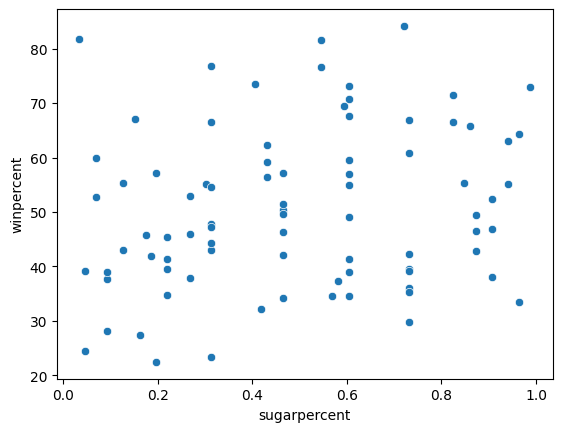

In [8]:
# Scatter plot showing the relationship between 'sugarpercent' and 'winpercent'　　「sugarpercent」と「winpercent」の関係を示す散布図
sns.scatterplot(x=candy_data['sugarpercent'], y=candy_data['winpercent'])

# Check your answer
step_3.a.check()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Use `sns.scatterplot`, and set the variables for the x-axis and y-axis by using `x=` and `y=`, respectively.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
# Scatter plot showing the relationship between 'sugarpercent' and 'winpercent'
sns.scatterplot(x=candy_data['sugarpercent'], y=candy_data['winpercent'])

```

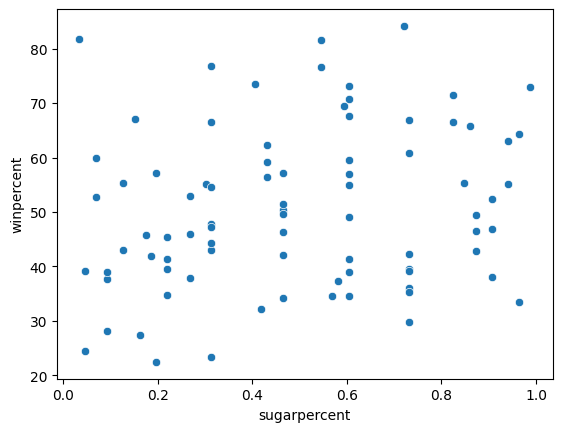

In [9]:
# Lines below will give you a hint or solution code
step_3.a.hint()
step_3.a.solution_plot()

#### Part B

Does the scatter plot show a **strong** correlation between the two variables?  If so, are candies with more sugar relatively more or less popular with the survey respondents?
散布図は 2 つの変数間に **強い**相関関係を示していますか? もしそうなら、砂糖を多く含むキャンディーは、調査回答者の間で相対的に多かれ少なかれ人気があるのでしょうか?

In [10]:
#step_3.b.hint()

In [11]:
# Check your answer (Run this code cell to receive credit!)
step_3.b.solution()

# 解決策: 散布図には 2 つの変数間の強い相関関係が示されていません。 2 つの変数の間には明確な関係がないため、砂糖含有量がキャンディーの人気に強い役割を果たしていないことがわかります。

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> The scatter plot does not show a strong correlation between the two variables. Since there is no clear relationship between the two variables, this tells us that sugar content does not play a strong role in candy popularity.

## Step 4: Take a closer look　　観察

#### Part A

Create the same scatter plot you created in **Step 3**, but now with a regression line!
　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　**ステップ 3** で作成したのと同じ散布図を作成しますが、今度は回帰直線を使用します。

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

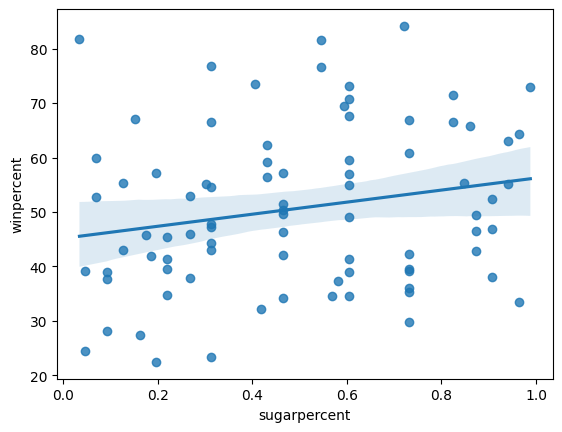

In [12]:
# Scatter plot w/ regression line showing the relationship between 'sugarpercent' and 'winpercent'
sns.regplot(x=candy_data['sugarpercent'], y=candy_data['winpercent']) 

# Check your answer
step_4.a.check()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Use `sns.regplot`, and set the variables for the x-axis and y-axis by using `x=` and `y=`, respectively.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
# Scatter plot w/ regression line showing the relationship between 'sugarpercent' and 'winpercent'
sns.regplot(x=candy_data['sugarpercent'], y=candy_data['winpercent'])

```

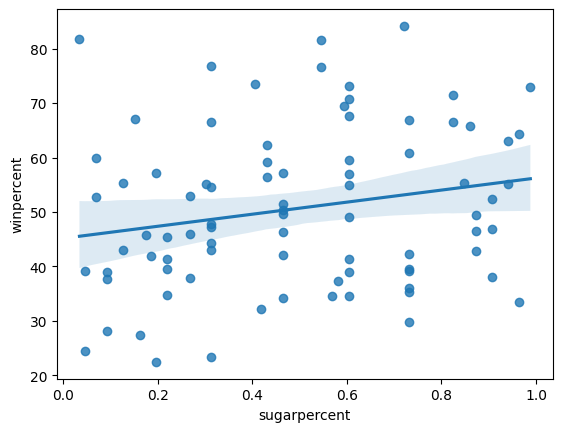

In [13]:
# Lines below will give you a hint or solution code
step_4.a.hint()
# ヒント: sns.regplot を使用し、x= と y= をそれぞれ使用して x 軸と y 軸の変数を設定します。
step_4.a.solution_plot()

#### Part B

According to the plot above, is there a **slight** correlation between `'winpercent'` and `'sugarpercent'`?  What does this tell you about the candy that people tend to prefer?

上記のプロットによると、「winpercent」と「sugarpercent」の間には**わずか**の相関関係がありますか? このことから、人々が好む傾向にあるキャンディーについて何がわかりますか?

In [14]:
#step_4.b.hint()

In [15]:
# Check your answer (Run this code cell to receive credit!)
step_4.b.solution()
# 解決策: 回帰直線はわずかに正の傾きを持っているため、「winpercent」と「sugarpercent」の間にわずかに正の相関関係があることがわかります。 したがって、人々は比較的多くの砂糖を含むキャンディーをわずかに好みます。

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> Since the regression line has a slightly positive slope, this tells us that there is a slightly positive correlation between `'winpercent'` and `'sugarpercent'`. Thus, people have a slight preference for candies containing relatively more sugar.

## Step 5: Chocolate!　チョコレート

In the code cell below, create a scatter plot to show the relationship between `'pricepercent'` (on the horizontal x-axis) and `'winpercent'` (on the vertical y-axis). Use the `'chocolate'` column to color-code the points.  _Don't add any regression lines just yet -- you'll do that in the next step!_
以下のコード セルで、散布図を作成して、`pricepercent'` (水平 x 軸) と `'winpercent'` (垂直 y 軸) の関係を示します。 「チョコレート」列を使用してポイントを色分けします。 _まだ回帰直線を追加しないでください。これは次のステップで行います!_

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

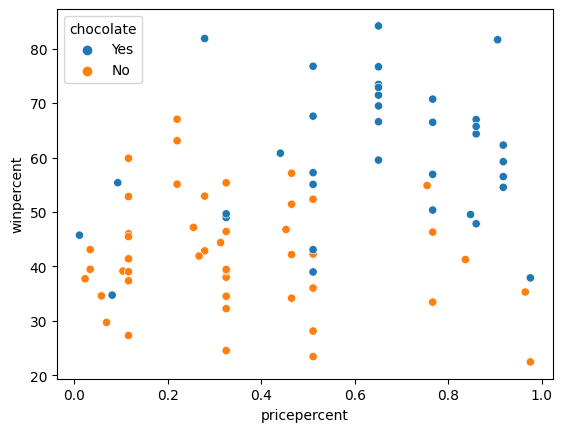

In [16]:
# Scatter plot showing the relationship between 'pricepercent', 'winpercent', and 'chocolate'
sns.scatterplot(x=candy_data['pricepercent'], y=candy_data['winpercent'], hue=candy_data['chocolate'])

# Check your answer
step_5.check()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Use `sns.scatterplot`, and set the variables for the x-axis, y-axis, and color of the points by using `x=`, `y=`, and `hue=`, respectively.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
# Scatter plot showing the relationship between 'pricepercent', 'winpercent', and 'chocolate'
sns.scatterplot(x=candy_data['pricepercent'], y=candy_data['winpercent'], hue=candy_data['chocolate'])

```

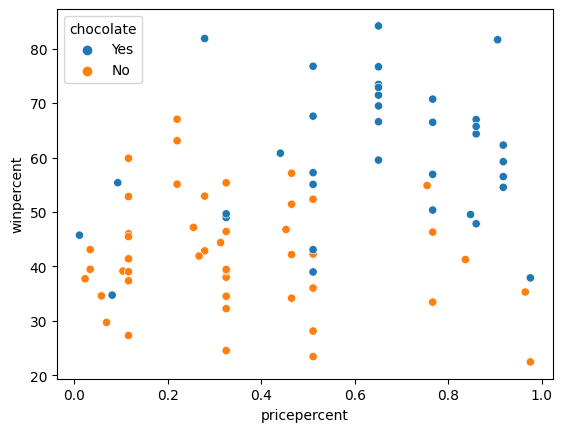

In [17]:
# Lines below will give you a hint or solution code
step_5.hint()
# ヒント: sns.scatterplot を使用し、x=、y=、hue= をそれぞれ使用して、点の x 軸、y 軸、および色の変数を設定します。
step_5.solution_plot()

Can you see any interesting patterns in the scatter plot?  We'll investigate this plot further  by adding regression lines in the next step!
散布図に興味深いパターンがあることがわかりますか? 次のステップで回帰直線を追加して、このプロットをさらに調査します。

## Step 6: Investigate chocolate　　チョコレートを調査

#### Part A

Create the same scatter plot you created in **Step 5**, but now with two regression lines, corresponding to (1) chocolate candies and (2) candies without chocolate.
**ステップ 5** で作成したのと同じ散布図を作成しますが、(1) チョコレート キャンディーと (2) チョコレートなしのキャンディーに対応する 2 つの回帰直線を作成します。

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

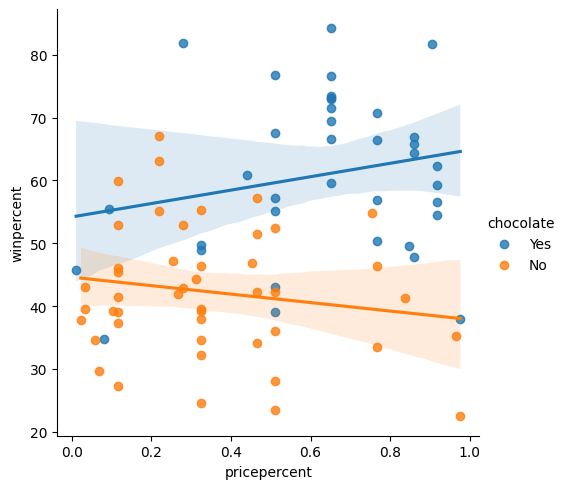

In [18]:
# Color-coded scatter plot w/ regression lines
sns.lmplot(x="pricepercent", y="winpercent", hue="chocolate", data=candy_data) # Your code here

# Check your answer
step_6.a.check()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Use `sns.lmplot`, and set the variables for the x-axis, y-axis, color of the points, and the dataset by using `x=`, `y=`, `hue=`, and `data=`, respectively.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
# Color-coded scatter plot w/ regression lines
sns.lmplot(x="pricepercent", y="winpercent", hue="chocolate", data=candy_data)

```

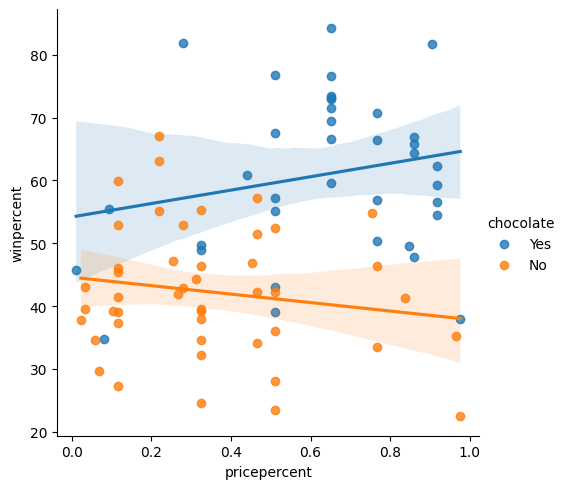

In [19]:
# Lines below will give you a hint or solution code
step_6.a.hint()
step_6.a.solution_plot()

#### Part B

Using the regression lines, what conclusions can you draw about the effects of chocolate and price on candy popularity?
回帰直線を使用すると、チョコレートと価格がキャンディーの人気に与える影響についてどのような結論を導くことができますか?

In [20]:
#step_6.b.hint()

In [21]:
# Check your answer (Run this code cell to receive credit!)
step_6.b.solution()
# 解決策: チョコレート キャンディーの回帰直線から始めます。 この線はわずかに正の傾きを持っているため、高価なチョコレート キャンディの方が (比較的安価なチョコレート キャンディよりも) 人気が高い傾向にあると言えます。 同様に、チョコレートを含まないキャンディーの回帰直線は負の傾きを持っているため、チョコレートが含まれていないキャンディーは、価格が安いほど人気が高くなる傾向があると言えます。 ただし、重要な注意点の 1 つは、データセットが非常に小さいということです。したがって、これらのパターンをあまり信頼すべきではありません。 結果に対する信頼性を高めるには、データセットにさらにキャンディーを追加する必要があります。

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> We'll begin with the regression line for chocolate candies. Since this line has a slightly positive slope, we can say that more expensive chocolate candies tend to be more popular (than relatively cheaper chocolate candies).  Likewise, since the regression line for candies without chocolate has a negative slope, we can say that if candies don't contain chocolate, they tend to be more popular when they are cheaper.  One important note, however, is that the dataset is quite small -- so we shouldn't invest too much trust in these patterns!  To inspire more confidence in the results, we should add more candies to the dataset.

## Step 7: Everybody loves chocolate.　みんなチョコレートが大好きです。

#### Part A

Create a categorical scatter plot to highlight the relationship between `'chocolate'` and `'winpercent'`.  Put `'chocolate'` on the (horizontal) x-axis, and `'winpercent'` on the (vertical) y-axis.
カテゴリ散布図を作成して、「chocolate」と「winpercent」の関係を強調表示します。 (水平) X 軸に「チョコレート」を配置し、(垂直) Y 軸に「winpercent」を配置します。

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

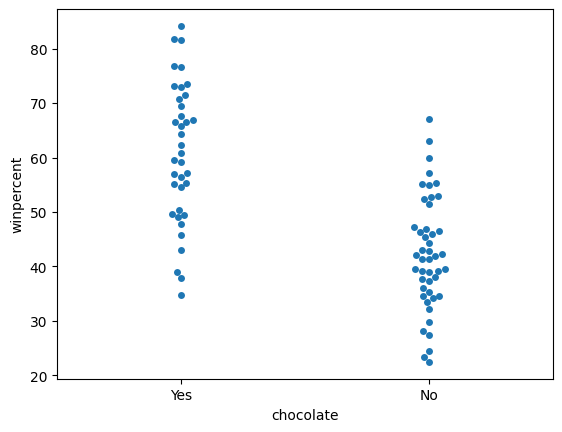

In [22]:
# Scatter plot showing the relationship between 'chocolate' and 'winpercent'　'chocolate' と 'winpercent' の関係を示す散布図
sns.swarmplot(x=candy_data['chocolate'], y=candy_data['winpercent']) # Your code here

# Check your answer
step_7.a.check()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Use `sns.swarmplot`, and set the variables for the x-axis and y-axis by using `x=` and `y=`, respectively.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
# Scatter plot showing the relationship between 'chocolate' and 'winpercent'
sns.swarmplot(x=candy_data['chocolate'], y=candy_data['winpercent'])

```

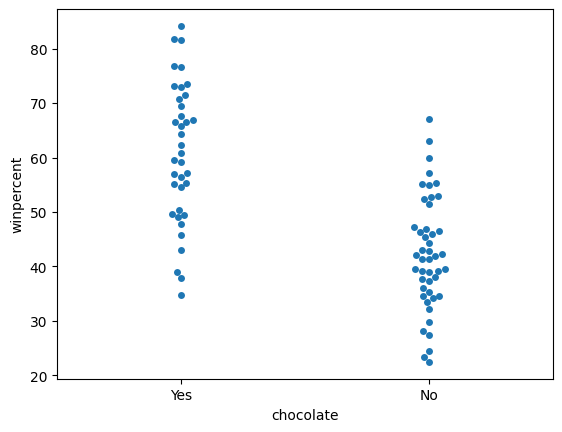

In [23]:
# Lines below will give you a hint or solution code
step_7.a.hint()
# ヒント: sns.swarmplot を使用し、x= と y= をそれぞれ使用して x 軸と y 軸の変数を設定します。
step_7.a.solution_plot()

#### Part B

You decide to dedicate a section of your report to the fact that chocolate candies tend to be more popular than candies without chocolate.  Which plot is more appropriate to tell this story: the plot from **Step 6**, or the plot from **Step 7**?
あなたは、チョコレート キャンディーがチョコレートを含まないキャンディーよりも人気がある傾向があるという事実についてレポートのセクションを捧げることにしました。 このストーリーを伝えるには、**ステップ 6** のプロットと **ステップ 7** のプロットのどちらがより適切ですか?

In [24]:
#step_7.b.hint()

In [25]:
# Check your answer (Run this code cell to receive credit!)
step_7.b.solution()
# 解決策: この場合、ステップ 7 のカテゴリ散布図がより適切なプロットです。 どちらのプロットも目的のストーリーを伝えていますが、ステップ 6 のプロットは、要点から注意をそらす可能性のあるはるかに多くの情報を伝えています。

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> In this case, the categorical scatter plot from **Step 7** is the more appropriate plot. While both plots tell the desired story, the plot from **Step 6** conveys far more information that could distract from the main point.

## Keep going

Explore **[histograms and density plots](https://www.kaggle.com/alexisbcook/distributions)**.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/data-visualization/discussion) to chat with other learners.*